# <center><u><b>HR Analytics<center><u><b>

## Importing required libraries

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set_style('darkgrid')
pd.set_option('display.max_columns',None)

## Importing Datasets

In [189]:
s1617 = pd.read_excel('staff utlz latest 16-17_masked.xlsx',header=[0,1])
s1718 = pd.read_excel('staff utlz latest 17-18_masked.xlsx',header=[0,1])
termination = pd.read_excel('Terminations 15-18.xlsx')

## Analysis

In [190]:
tmp1 = s1617['Total']
tmp2 = s1718['Total']

In [191]:
tmp1.drop('Utilization%',axis=1,inplace=True)
tmp2.drop('Utilization%',axis=1,inplace=True)

In [192]:
tmp3 = s1617.iloc[:,0:11]
tmp3 = tmp3.droplevel(level=0,axis=1)

tmp4 = s1718.iloc[:,0:11]
tmp4 = tmp4.droplevel(level=0,axis=1)

In [193]:
df1 = pd.concat([tmp3,tmp1],axis=1)
df2 = pd.concat([tmp4,tmp2],axis=1)

In [194]:
df1.loc[df1['BD Hours']<0,'BD Hours'] = 0
df1.loc[df1['Training Hours']<0,'Training Hours'] = 0
df1.loc[df1['NC Hours']<0,'NC Hours'] = 0

In [195]:
df2.loc[df2['Total Available Hours']<0,'Total Available Hours'] = 0
df2.loc[df2['Work Hours']<0,'Work Hours'] = 0
df2.loc[df2['NC Hours']<0,'Work Hours'] = 0

In [196]:
# Employee_list
list1617 = df1[['Employee No','Employee Name']]
list1718 = df2[['Employee No','Employee Name']]

employee_list = list1617.append(list1718)
employee_list.drop_duplicates('Employee No',ignore_index=True,inplace=True,keep='last')
employee_list = employee_list.sort_values('Employee No')
employee_list = employee_list.reset_index(drop=True)

### Year 2016-17

In [197]:
tenure = pd.to_datetime('2017-04-01')
resigned = pd.to_datetime('2016-04-01')

In [198]:
df1['date'] = df1['Termination Date'].copy()
df1['date'] = df1['date'].replace('-',tenure)

In [199]:
df1['months'] = (df1['date'] - df1['Join Date'])/np.timedelta64(1,'M')
df1.loc[df1['date']!=tenure,'months'] = (df1['date']-resigned)/np.timedelta64(1,'M')
df1['months'] = round(df1['months'],0)
df1.loc[df1['months']==0,'months'] = 1

# Tenure in year
df1['tenure'] = df1['months'].copy()
df1['tenure'] = round(df1['tenure']/12,1)

# for cal of utilization of 1 year
df1.loc[df1['months']>12,'months'] = 12

In [200]:
cols = ['Total Hours','Total Available Hours','Work Hours','Leave Hours','Training Hours','BD Hours','NC Hours']

In [201]:
pm = []
for c in cols:
    pm.append(c + '_pm')
pm

['Total Hours_pm',
 'Total Available Hours_pm',
 'Work Hours_pm',
 'Leave Hours_pm',
 'Training Hours_pm',
 'BD Hours_pm',
 'NC Hours_pm']

In [202]:
for i,j in zip(cols,pm):
    df1[j] = round(df1[i]/df1['months'],0)

In [203]:
df1.drop(cols,axis=1,inplace=True)
df1.drop('Termination Date',axis=1,inplace=True)

In [204]:
df1.loc[df1['Current Status']=='Resigned','y'] = 1
df1.loc[df1['Current Status']!='Resigned','y'] = 0

In [205]:
df1['y'] = df1['y'].astype('int64')

In [206]:
df1['Utilization%_pm'] = round((df1['Work Hours_pm']/df1['Total Available Hours_pm'])*100,2)

In [207]:
# Employee with more than 200 utilisation - removed from dataset 
df1[df1['Utilization%_pm']>200]

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,date,months,tenure,Total Hours_pm,Total Available Hours_pm,Work Hours_pm,Leave Hours_pm,Training Hours_pm,BD Hours_pm,NC Hours_pm,y,Utilization%_pm
374,375,PC - 5,Arlyn Roz,Level 8,Location 1,Client Service Staff,Serving Notice Period,Hedwiga Mehetabel,2015-05-31,Resigned,2016-04-30,1.0,0.1,8.0,8.0,48.0,0.0,0.0,0.0,0.0,1,600.0


In [208]:
df1.drop(index=374,inplace=True)

In [209]:
df1['Current Status'].value_counts()

Active        628
Resigned      140
New Joiner     15
Secondment      5
Name: Current Status, dtype: int64

### Year 2017-18

In [210]:
df2['Current Status'].value_counts()

Active        796
Resigned      145
New Joiner     24
Secondment      6
Sabbatical      2
Name: Current Status, dtype: int64

In [211]:
#There are people who have left organisation after 31-03-2018.
df2.loc[df2['Termination Date']>'2018-03-31']

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours
14,19,PC - 3,Cordey Sofia,Level 3,Location 1,Client Service Staff,Resigned,Cacilia Aimee,2006-05-31,Resigned,2018-04-30,2080.0,1812.0,77.5,268.0,0.0,0.0,2030.0
63,76,PC - 2,Goldarina Cecilia,Level 6,Location 7,Client Service Staff,Resigned,Myrtie Brana,2011-04-30,Resigned,2018-04-30,2080.0,1700.0,1339.0,368.0,12.0,0.0,374.0
95,119,PC - 3,Eydie Francine,Level 5,Location 1,Client Service Staff,Resigned,Lenora Nydia,2012-05-31,Resigned,2018-04-30,2080.0,1888.0,864.0,192.0,0.0,0.0,1024.0
132,167,PC - 3,Ashla Charmane,Level 6,Location 1,Client Service Staff,Resigned,Vonni Bethena,2013-05-31,Resigned,2018-04-30,2080.0,1840.0,1728.0,240.0,0.0,0.0,136.0
259,333,PC - 2,Cloe Rosalind,Level 6,Location 7,Client Service Staff,Resigned,Frances Mignonne,2015-03-31,Resigned,2018-04-30,2080.0,1912.0,1184.0,160.0,8.0,0.0,872.0
301,382,PC - 2,Viviana Roze,Level 8,Location 7,Client Service Staff,Resigned,Cassandra Katerina,2015-05-31,Resigned,2018-05-31,2080.0,1757.5,1640.5,280.0,42.5,0.0,146.0
306,387,PC - 2,Hedwiga Mehetabel,Level 5,Location 7,Client Service Staff,Resigned,Cacilia Aimee,2015-05-31,Resigned,2018-05-31,2080.0,1920.0,1516.0,160.0,0.0,404.0,0.0
406,514,PC - 1,Krista Patrica,Level 7,Location 3,Client Service Staff,Resigned,Blondy Tatiania,2016-01-31,Resigned,2018-04-30,2080.0,1896.0,1672.0,176.0,8.0,0.0,308.0
526,646,PC - 2,Edie Pierette,Level 8,Location 7,Client Service Staff,Resigned,Rosabella Arlina,2016-06-30,Resigned,2018-05-31,2080.0,1895.5,1858.0,184.0,0.5,4.0,57.0
781,919,PC - 3,Rayna Armstrong,Level 8,Location 1,Client Service Staff,Resigned,Gert Editha,2017-06-30,Resigned,2018-04-30,1640.0,1463.0,1256.0,120.0,57.0,0.0,407.0


In [212]:
# For employees who have left the organisation after 31-03-2018, have considered them as resigned on 31-03-2018 
df2.loc[df2['Termination Date']>'2018-03-31','Termination Date'] = pd.to_datetime('2018-03-31')

In [213]:
df2.loc[df2['Termination Date']>'2018-03-31']

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Termination Date,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours


In [214]:
tenure = pd.to_datetime('2018-04-01')
resigned = pd.to_datetime('2017-04-01')

df2['date'] = df2['Termination Date'].copy()
df2['date'] = df2['date'].replace(np.nan,tenure)

df2['months'] = (df2['date'] - df2['Join Date'])/np.timedelta64(1,'M')
df2.loc[df2['date']!=tenure,'months'] = (df2['date']-resigned)/np.timedelta64(1,'M')
df2['months'] = round(df2['months'],0)
df2.loc[df2['months']==0,'months'] = 1

# Tenure in year
df2['tenure'] = df2['months'].copy()
df2['tenure'] = round(df2['tenure']/12,1)

# for cal of utilization of 1 year
df2.loc[df2['months']>12,'months'] = 12

cols = ['Total Hours','Total Available Hours','Work Hours','Leave Hours','Training Hours','BD Hours','NC Hours']

pm = []
for c in cols:
    pm.append(c + '_pm')

for i,j in zip(cols,pm):
    df2[j] = round(df2[i]/df2['months'],0)

df2.drop(cols,axis=1,inplace=True)
df2.drop('Termination Date',axis=1,inplace=True)

df2.loc[df2['Current Status']=='Resigned','y'] = 1
df2.loc[df2['Current Status']!='Resigned','y'] = 0

df2['y'] = df2['y'].astype('int64')

df2['Utilization%_pm'] = round((df2['Work Hours_pm']/df2['Total Available Hours_pm'])*100,2)

In [215]:
df2.dtypes

Employee No                          int64
Profit Center                       object
Employee Name                       object
Employee Position                   object
Employee Location                   object
People Group                        object
Employee Category                   object
Supervisor name                     object
Join Date                   datetime64[ns]
Current Status                      object
date                        datetime64[ns]
months                             float64
tenure                             float64
Total Hours_pm                     float64
Total Available Hours_pm           float64
Work Hours_pm                      float64
Leave Hours_pm                     float64
Training Hours_pm                  float64
BD Hours_pm                        float64
NC Hours_pm                        float64
y                                    int64
Utilization%_pm                    float64
dtype: object

In [216]:
df1.sample(5)

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,date,months,tenure,Total Hours_pm,Total Available Hours_pm,Work Hours_pm,Leave Hours_pm,Training Hours_pm,BD Hours_pm,NC Hours_pm,y,Utilization%_pm
586,587,PC - 2,Gretta Sarina,Level 7,Location 9,Client Service Staff,Confirmed Staff,Orelee Hanna,2016-04-30,Active,2017-04-01,11.0,0.9,185.0,152.0,151.0,20.0,14.0,0.0,43.0,0,99.34
706,707,PC - 1,Ilsa Marigold,Level 5,Location 3,Client Service Staff,Confirmed Staff,Alvinia Ede,2016-08-31,Active,2017-04-01,7.0,0.6,200.0,171.0,39.0,18.0,10.0,0.0,136.0,0,22.81
501,502,PC - 2,Dell Clary,Level 6,Location 7,Client Service Staff,Confirmed Staff,Philippe Kizzie,2015-12-31,Active,2017-04-01,12.0,1.2,174.0,146.0,126.0,18.0,10.0,2.0,31.0,0,86.30
339,340,PC - 2,Tomasina Rozina,Level 7,Location 7,Client Service Staff,Confirmed Staff,Trenna Mureil,2015-04-30,Active,2017-04-01,12.0,1.9,174.0,163.0,138.0,11.0,0.0,0.0,39.0,0,84.66
159,160,PC - 2,Chicky Karita,Level 6,Location 9,Client Service Staff,Confirmed Staff,Marleah Bernadina,2013-05-31,Active,2017-04-01,12.0,3.8,174.0,140.0,124.0,31.0,3.0,0.0,19.0,0,88.57


In [217]:
df2.sample(5)

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,date,months,tenure,Total Hours_pm,Total Available Hours_pm,Work Hours_pm,Leave Hours_pm,Training Hours_pm,BD Hours_pm,NC Hours_pm,y,Utilization%_pm
406,514,PC - 1,Krista Patrica,Level 7,Location 3,Client Service Staff,Resigned,Blondy Tatiania,2016-01-31,Resigned,2018-03-31,12.0,1.0,173.0,158.0,139.0,15.0,1.0,0.0,26.0,1,87.97
257,329,PC - 2,Claresta Dalenna,Level 6,Location 7,Client Service Staff,Confirmed Staff,Cassandra Katerina,2015-03-31,Active,2018-04-01,12.0,3.0,173.0,164.0,127.0,7.0,2.0,0.0,56.0,0,77.44
505,623,PC - 3,Nelia Eartha,Level 7,Location 1,Client Service Staff,Confirmed Staff,Zaneta Arlette,2016-06-30,Active,2018-04-01,12.0,1.8,173.0,148.0,150.0,22.0,3.0,0.0,3.0,0,101.35
345,439,PC - 3,Konstance Joeann,Level 5,Location 2,Client Service Staff,Confirmed Staff,Kynthia Hildy,2015-07-31,Active,2018-04-01,12.0,2.7,173.0,142.0,102.0,30.0,2.0,0.0,60.0,0,71.83
607,736,PC - 2,Sallie Kiah,Level 5,Location 7,Client Service Staff,Confirmed Staff,Trudey Lissi,2016-12-31,Active,2018-04-01,12.0,1.2,173.0,162.0,5.0,9.0,3.0,0.0,157.0,0,3.09


## Merging both year data

In [218]:
cols1 = ['Employee No','Join Date','Total Hours_pm', 'Total Available Hours_pm', 'Work Hours_pm',
       'Leave Hours_pm', 'Training Hours_pm', 'BD Hours_pm', 'NC Hours_pm','Utilization%_pm','Current Status','y']

In [219]:
df3 = df1[cols1]
df4 = df2[cols1]

In [220]:
df3.shape

(788, 12)

In [221]:
df4.shape

(973, 12)

In [222]:
df4.loc[df4['Utilization%_pm'].isnull(),'Utilization%_pm'] = 0.0

In [223]:
df5 = pd.merge(df3,df4,how='outer',on='Employee No')

In [224]:
# Employee available in 16-17 but not available in 17-18
issue = df5[(df5['y_x']==0) & (df5['y_y'].isnull())]
issue

,Employee No,Join Date_x,Total Hours_pm_x,Total Available Hours_pm_x,Work Hours_pm_x,Leave Hours_pm_x,Training Hours_pm_x,BD Hours_pm_x,NC Hours_pm_x,Utilization%_pm_x,Current Status_x,y_x,Join Date_y,Total Hours_pm_y,Total Available Hours_pm_y,Work Hours_pm_y,Leave Hours_pm_y,Training Hours_pm_y,BD Hours_pm_y,NC Hours_pm_y,Utilization%_pm_y,Current Status_y,y_y
4,5,1998-06-30,109.0,100.0,12.0,9.0,0.0,97.0,68.0,12.00,Active,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,62,2010-10-31,88.0,68.0,41.0,19.0,1.0,0.0,31.0,60.29,Secondment,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,96,2011-09-30,100.0,90.0,75.0,10.0,0.0,0.0,15.0,83.33,Secondment,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,213,2013-11-30,57.0,52.0,13.0,5.0,0.0,0.0,39.0,25.00,Secondment,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,248,2014-06-30,116.0,107.0,42.0,9.0,0.0,0.0,66.0,39.25,Active,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,433,2015-07-31,0.0,0.0,0.0,0.0,0.0,14.0,0.0,NaN,Active,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
index = [4,61,95,212,247,432]
df5.drop(index=index,inplace=True)

In [226]:
df5.sample(5)

,Employee No,Join Date_x,Total Hours_pm_x,Total Available Hours_pm_x,Work Hours_pm_x,Leave Hours_pm_x,Training Hours_pm_x,BD Hours_pm_x,NC Hours_pm_x,Utilization%_pm_x,Current Status_x,y_x,Join Date_y,Total Hours_pm_y,Total Available Hours_pm_y,Work Hours_pm_y,Leave Hours_pm_y,Training Hours_pm_y,BD Hours_pm_y,NC Hours_pm_y,Utilization%_pm_y,Current Status_y,y_y
45,46,2010-01-31,40.0,37.0,15.0,3.0,0.0,0.0,22.0,40.54,Active,0.0,2010-01-31,173.0,148.0,126.0,24.0,2.0,0.0,22.0,85.14,Active,0.0
1089,1087,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-31,160.0,152.0,0.0,0.0,8.0,0.0,152.0,0.00,New Joiner,0.0
178,179,2013-06-30,174.0,116.0,108.0,58.0,0.0,0.0,24.0,93.10,Active,0.0,2013-06-30,160.0,153.0,163.0,7.0,0.0,0.0,27.0,106.54,Resigned,1.0
866,867,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-30,191.0,172.0,154.0,14.0,5.0,0.0,38.0,89.53,Active,0.0
1093,1091,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-31,120.0,90.0,64.0,8.0,22.0,0.0,26.0,71.11,New Joiner,0.0


In [227]:
# Employees who have joined before 2016-04-01, not available in 2016-17 but available in 2017-18 
py_missing = df5[(df5['Utilization%_pm_x'].isnull()) & (df5['Join Date_y']<='2016-04-01')]
py_missing

,Employee No,Join Date_x,Total Hours_pm_x,Total Available Hours_pm_x,Work Hours_pm_x,Leave Hours_pm_x,Training Hours_pm_x,BD Hours_pm_x,NC Hours_pm_x,Utilization%_pm_x,Current Status_x,y_x,Join Date_y,Total Hours_pm_y,Total Available Hours_pm_y,Work Hours_pm_y,Leave Hours_pm_y,Training Hours_pm_y,BD Hours_pm_y,NC Hours_pm_y,Utilization%_pm_y,Current Status_y,y_y
788,790,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-04-30,145.0,129.0,78.0,12.0,3.0,0.0,52.0,60.47,Active,0.0
789,791,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-09-30,43.0,40.0,0.0,3.0,0.0,0.0,40.0,0.00,Active,0.0
790,792,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-30,57.0,57.0,58.0,0.0,0.0,0.0,0.0,101.75,Active,0.0
791,793,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-07-31,28.0,27.0,23.0,1.0,1.0,0.0,13.0,85.19,Active,0.0
792,794,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-31,57.0,54.0,37.0,3.0,0.0,0.0,0.0,68.52,Active,0.0
793,795,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-30,87.0,65.0,55.0,21.0,0.0,0.0,11.0,84.62,Active,0.0
794,796,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-31,130.0,115.0,89.0,15.0,0.0,0.0,42.0,77.39,Active,0.0
795,797,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-31,57.0,49.0,46.0,7.0,0.0,0.0,3.0,93.88,Active,0.0


In [228]:
index = list(range(789,797,1))
df5.drop(index=index,inplace=True)

In [229]:
xcols = ['Total Hours_pm_x','Total Available Hours_pm_x','Work Hours_pm_x','Leave Hours_pm_x','Training Hours_pm_x','BD Hours_pm_x','NC Hours_pm_x']
ycols = ['Total Hours_pm_y','Total Available Hours_pm_y','Work Hours_pm_y','Leave Hours_pm_y','Training Hours_pm_y','BD Hours_pm_y','NC Hours_pm_y']
cols = ['Total Hours','Total Available Hours','Work Hours','Leave Hours','Training Hours','BD Hours','NC Hours']

In [230]:
df5[(df5['Utilization%_pm_x'].isnull())]

,Employee No,Join Date_x,Total Hours_pm_x,Total Available Hours_pm_x,Work Hours_pm_x,Leave Hours_pm_x,Training Hours_pm_x,BD Hours_pm_x,NC Hours_pm_x,Utilization%_pm_x,Current Status_x,y_x,Join Date_y,Total Hours_pm_y,Total Available Hours_pm_y,Work Hours_pm_y,Leave Hours_pm_y,Training Hours_pm_y,BD Hours_pm_y,NC Hours_pm_y,Utilization%_pm_y,Current Status_y,y_y
431,433,2015-07-31,0.0,0.0,0.0,0.0,0.0,14.0,0.0,NaN,Active,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
788,790,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-04-30,145.0,129.0,78.0,12.0,3.0,0.0,52.0,60.47,Active,0.0
797,799,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-30,134.0,128.0,78.0,2.0,4.0,0.0,57.0,60.94,Resigned,1.0
798,800,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-30,189.0,162.0,122.0,17.0,10.0,0.0,64.0,75.31,Active,0.0
799,801,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-30,189.0,157.0,140.0,21.0,11.0,11.0,21.0,89.17,Active,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,1103,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-31,80.0,0.0,0.0,0.0,120.0,0.0,0.0,0.00,New Joiner,0.0
1106,1111,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-31,40.0,24.0,0.0,8.0,8.0,0.0,24.0,0.00,New Joiner,0.0
1107,1104,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-31,40.0,9.0,0.0,8.0,23.0,0.0,9.0,0.00,New Joiner,0.0
1108,1105,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-31,40.0,0.0,0.0,8.0,32.0,0.0,0.0,0.00,New Joiner,0.0


In [231]:
for col in cols:
    df5[col] = np.nan

In [232]:
df5.head()

,Employee No,Join Date_x,Total Hours_pm_x,Total Available Hours_pm_x,Work Hours_pm_x,Leave Hours_pm_x,Training Hours_pm_x,BD Hours_pm_x,NC Hours_pm_x,Utilization%_pm_x,Current Status_x,y_x,Join Date_y,Total Hours_pm_y,Total Available Hours_pm_y,Work Hours_pm_y,Leave Hours_pm_y,Training Hours_pm_y,BD Hours_pm_y,NC Hours_pm_y,Utilization%_pm_y,Current Status_y,y_y,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours
0,1,2000-09-30,174.0,150.0,53.0,18.0,6.0,99.0,5.0,35.33,Active,0.0,2000-09-30,173.0,155.0,37.0,16.0,2.0,119.0,2.0,23.87,Active,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1999-05-31,174.0,157.0,46.0,13.0,4.0,58.0,61.0,29.30,Active,0.0,1999-05-31,173.0,156.0,60.0,17.0,0.0,50.0,50.0,38.46,Active,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2001-01-31,174.0,158.0,84.0,12.0,4.0,42.0,46.0,53.16,Active,0.0,2001-01-31,173.0,143.0,98.0,28.0,2.0,39.0,30.0,68.53,Active,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2000-09-30,174.0,154.0,23.0,17.0,2.0,115.0,21.0,14.94,Active,0.0,2000-09-30,167.0,149.0,25.0,18.0,0.0,124.0,2.0,16.78,Resigned,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2002-06-30,174.0,152.0,39.0,22.0,0.0,118.0,22.0,25.66,Active,0.0,2002-06-30,173.0,151.0,36.0,22.0,1.0,103.0,39.0,23.84,Active,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
df5['Join Date']  = df5['Join Date_y'].copy()

In [234]:
df5.head()

,Employee No,Join Date_x,Total Hours_pm_x,Total Available Hours_pm_x,Work Hours_pm_x,Leave Hours_pm_x,Training Hours_pm_x,BD Hours_pm_x,NC Hours_pm_x,Utilization%_pm_x,Current Status_x,y_x,Join Date_y,Total Hours_pm_y,Total Available Hours_pm_y,Work Hours_pm_y,Leave Hours_pm_y,Training Hours_pm_y,BD Hours_pm_y,NC Hours_pm_y,Utilization%_pm_y,Current Status_y,y_y,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Join Date
0,1,2000-09-30,174.0,150.0,53.0,18.0,6.0,99.0,5.0,35.33,Active,0.0,2000-09-30,173.0,155.0,37.0,16.0,2.0,119.0,2.0,23.87,Active,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-09-30
1,2,1999-05-31,174.0,157.0,46.0,13.0,4.0,58.0,61.0,29.30,Active,0.0,1999-05-31,173.0,156.0,60.0,17.0,0.0,50.0,50.0,38.46,Active,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-05-31
2,3,2001-01-31,174.0,158.0,84.0,12.0,4.0,42.0,46.0,53.16,Active,0.0,2001-01-31,173.0,143.0,98.0,28.0,2.0,39.0,30.0,68.53,Active,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-01-31
3,4,2000-09-30,174.0,154.0,23.0,17.0,2.0,115.0,21.0,14.94,Active,0.0,2000-09-30,167.0,149.0,25.0,18.0,0.0,124.0,2.0,16.78,Resigned,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-09-30
5,6,2002-06-30,174.0,152.0,39.0,22.0,0.0,118.0,22.0,25.66,Active,0.0,2002-06-30,173.0,151.0,36.0,22.0,1.0,103.0,39.0,23.84,Active,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-06-30


In [235]:
ycols

['Total Hours_pm_y',
 'Total Available Hours_pm_y',
 'Work Hours_pm_y',
 'Leave Hours_pm_y',
 'Training Hours_pm_y',
 'BD Hours_pm_y',
 'NC Hours_pm_y']

In [236]:
for x,y,c in zip(xcols,ycols,cols):
    df5.loc[:,c] = round((df5[x] + df5[y])/2,2)

In [237]:
df5[df5['Utilization%_pm_x'].notnull()]

,Employee No,Join Date_x,Total Hours_pm_x,Total Available Hours_pm_x,Work Hours_pm_x,Leave Hours_pm_x,Training Hours_pm_x,BD Hours_pm_x,NC Hours_pm_x,Utilization%_pm_x,Current Status_x,y_x,Join Date_y,Total Hours_pm_y,Total Available Hours_pm_y,Work Hours_pm_y,Leave Hours_pm_y,Training Hours_pm_y,BD Hours_pm_y,NC Hours_pm_y,Utilization%_pm_y,Current Status_y,y_y,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Join Date
0,1,2000-09-30,174.0,150.0,53.0,18.0,6.0,99.0,5.0,35.33,Active,0.0,2000-09-30,173.0,155.0,37.0,16.0,2.0,119.0,2.0,23.87,Active,0.0,173.5,152.5,45.0,17.0,4.0,109.0,3.5,2000-09-30
1,2,1999-05-31,174.0,157.0,46.0,13.0,4.0,58.0,61.0,29.30,Active,0.0,1999-05-31,173.0,156.0,60.0,17.0,0.0,50.0,50.0,38.46,Active,0.0,173.5,156.5,53.0,15.0,2.0,54.0,55.5,1999-05-31
2,3,2001-01-31,174.0,158.0,84.0,12.0,4.0,42.0,46.0,53.16,Active,0.0,2001-01-31,173.0,143.0,98.0,28.0,2.0,39.0,30.0,68.53,Active,0.0,173.5,150.5,91.0,20.0,3.0,40.5,38.0,2001-01-31
3,4,2000-09-30,174.0,154.0,23.0,17.0,2.0,115.0,21.0,14.94,Active,0.0,2000-09-30,167.0,149.0,25.0,18.0,0.0,124.0,2.0,16.78,Resigned,1.0,170.5,151.5,24.0,17.5,1.0,119.5,11.5,2000-09-30
5,6,2002-06-30,174.0,152.0,39.0,22.0,0.0,118.0,22.0,25.66,Active,0.0,2002-06-30,173.0,151.0,36.0,22.0,1.0,103.0,39.0,23.84,Active,0.0,173.5,151.5,37.5,22.0,0.5,110.5,30.5,2002-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,785,2017-03-31,80.0,32.0,32.0,8.0,40.0,0.0,0.0,100.00,New Joiner,0.0,2017-03-31,173.0,163.0,163.0,8.0,3.0,0.0,0.0,100.00,Active,0.0,126.5,97.5,97.5,8.0,21.5,0.0,0.0,2017-03-31
784,786,2017-03-31,80.0,40.0,0.0,0.0,40.0,0.0,40.0,0.00,New Joiner,0.0,2017-03-31,164.0,135.0,118.0,21.0,8.0,0.0,41.0,87.41,Resigned,1.0,122.0,87.5,59.0,10.5,24.0,0.0,40.5,2017-03-31
785,787,2017-03-31,80.0,72.0,0.0,0.0,8.0,0.0,72.0,0.00,New Joiner,0.0,2017-03-31,173.0,157.0,105.0,17.0,0.0,0.0,53.0,66.88,Active,0.0,126.5,114.5,52.5,8.5,4.0,0.0,62.5,2017-03-31
786,788,2017-03-31,40.0,32.0,0.0,8.0,0.0,0.0,32.0,0.00,New Joiner,0.0,2017-03-31,160.0,153.0,138.0,7.0,0.0,0.0,31.0,90.20,Resigned,1.0,100.0,92.5,69.0,7.5,0.0,0.0,31.5,2017-03-31


In [238]:
df5.loc[(df5['Work Hours_pm_y']==0) & (df5['Utilization%_pm_y'].isnull()),'Utilization%_pm_y'] = 0

In [239]:
for y,c in zip(ycols,cols):
    df5.loc[(df5['Total Hours_pm_x'].isnull()) & (df5['Total Hours_pm_y'].notnull()),c] = df5[y].copy()

In [240]:
df5.loc[(df5['Total Hours_pm_x'].isnull()) & (df5['Total Hours_pm_y'].notnull())]

,Employee No,Join Date_x,Total Hours_pm_x,Total Available Hours_pm_x,Work Hours_pm_x,Leave Hours_pm_x,Training Hours_pm_x,BD Hours_pm_x,NC Hours_pm_x,Utilization%_pm_x,Current Status_x,y_x,Join Date_y,Total Hours_pm_y,Total Available Hours_pm_y,Work Hours_pm_y,Leave Hours_pm_y,Training Hours_pm_y,BD Hours_pm_y,NC Hours_pm_y,Utilization%_pm_y,Current Status_y,y_y,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Join Date
788,790,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-04-30,145.0,129.0,78.0,12.0,3.0,0.0,52.0,60.47,Active,0.0,145.0,129.0,78.0,12.0,3.0,0.0,52.0,2011-04-30
797,799,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-30,134.0,128.0,78.0,2.0,4.0,0.0,57.0,60.94,Resigned,1.0,134.0,128.0,78.0,2.0,4.0,0.0,57.0,2017-04-30
798,800,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-30,189.0,162.0,122.0,17.0,10.0,0.0,64.0,75.31,Active,0.0,189.0,162.0,122.0,17.0,10.0,0.0,64.0,2017-04-30
799,801,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-30,189.0,157.0,140.0,21.0,11.0,11.0,21.0,89.17,Active,0.0,189.0,157.0,140.0,21.0,11.0,11.0,21.0,2017-04-30
800,802,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-30,189.0,158.0,138.0,20.0,12.0,9.0,24.0,87.34,Active,0.0,189.0,158.0,138.0,20.0,12.0,9.0,24.0,2017-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,1103,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-31,80.0,0.0,0.0,0.0,120.0,0.0,0.0,0.00,New Joiner,0.0,80.0,0.0,0.0,0.0,120.0,0.0,0.0,2018-03-31
1106,1111,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-31,40.0,24.0,0.0,8.0,8.0,0.0,24.0,0.00,New Joiner,0.0,40.0,24.0,0.0,8.0,8.0,0.0,24.0,2018-03-31
1107,1104,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-31,40.0,9.0,0.0,8.0,23.0,0.0,9.0,0.00,New Joiner,0.0,40.0,9.0,0.0,8.0,23.0,0.0,9.0,2018-03-31
1108,1105,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-31,40.0,0.0,0.0,8.0,32.0,0.0,0.0,0.00,New Joiner,0.0,40.0,0.0,0.0,8.0,32.0,0.0,0.0,2018-03-31


In [241]:
for x,c in zip(xcols,cols):
    df5.loc[(df5['Total Hours_pm_y'].isnull()) & (df5['Total Hours_pm_x'].notnull()),c] = df5[x].copy()

In [242]:
df5.loc[(df5['Total Hours_pm_y'].isnull()) & (df5['Total Hours_pm_x'].notnull())]

,Employee No,Join Date_x,Total Hours_pm_x,Total Available Hours_pm_x,Work Hours_pm_x,Leave Hours_pm_x,Training Hours_pm_x,BD Hours_pm_x,NC Hours_pm_x,Utilization%_pm_x,Current Status_x,y_x,Join Date_y,Total Hours_pm_y,Total Available Hours_pm_y,Work Hours_pm_y,Leave Hours_pm_y,Training Hours_pm_y,BD Hours_pm_y,NC Hours_pm_y,Utilization%_pm_y,Current Status_y,y_y,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Join Date
7,8,2004-07-31,174.0,153.0,10.0,22.0,0.0,126.0,19.0,6.54,Resigned,1.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.0,153.0,10.0,22.0,0.0,126.0,19.0,NaT
10,11,2004-11-30,162.0,153.0,72.0,9.0,0.0,0.0,89.0,47.06,Resigned,1.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162.0,153.0,72.0,9.0,0.0,0.0,89.0,NaT
14,15,2005-02-28,174.0,153.0,7.0,21.0,0.0,0.0,149.0,4.58,Resigned,1.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.0,153.0,7.0,21.0,0.0,0.0,149.0,NaT
35,36,2009-01-31,170.0,154.0,138.0,16.0,0.0,0.0,16.0,89.61,Resigned,1.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,154.0,138.0,16.0,0.0,0.0,16.0,NaT
41,42,2009-07-31,136.0,88.0,84.0,48.0,0.0,0.0,10.0,95.45,Resigned,1.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.0,88.0,84.0,48.0,0.0,0.0,10.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,680,2016-07-31,72.0,61.0,0.0,5.0,6.0,0.0,56.0,0.00,Resigned,1.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,61.0,0.0,5.0,6.0,0.0,56.0,NaT
690,692,2016-07-31,72.0,43.0,19.0,16.0,13.0,0.0,31.0,44.19,Resigned,1.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,43.0,19.0,16.0,13.0,0.0,31.0,NaT
702,704,2016-07-31,96.0,80.0,81.0,11.0,5.0,0.0,18.0,101.25,Resigned,1.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,80.0,81.0,11.0,5.0,0.0,18.0,NaT
707,709,2016-08-31,69.0,56.0,27.0,6.0,7.0,0.0,35.0,48.21,Resigned,1.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,56.0,27.0,6.0,7.0,0.0,35.0,NaT


In [243]:
def missing(df):
    m = df.isnull().sum()
    return m[m>0]

In [244]:
df5.loc[(df5['Join Date_x'].isnull()) & (df5['Join Date_y'].notnull()),'Join Date'] = df5['Join Date_y'].copy()
df5.loc[(df5['Join Date_y'].isnull()) & (df5['Join Date_x'].notnull()),'Join Date'] = df5['Join Date_x'].copy()

In [245]:
missing(df5)

Join Date_x                   314
Total Hours_pm_x              314
Total Available Hours_pm_x    314
Work Hours_pm_x               314
Leave Hours_pm_x              314
Training Hours_pm_x           314
BD Hours_pm_x                 314
NC Hours_pm_x                 314
Utilization%_pm_x             315
Current Status_x              314
y_x                           314
Join Date_y                   132
Total Hours_pm_y              132
Total Available Hours_pm_y    132
Work Hours_pm_y               132
Leave Hours_pm_y              132
Training Hours_pm_y           132
BD Hours_pm_y                 132
NC Hours_pm_y                 132
Utilization%_pm_y             132
Current Status_y              132
y_y                           132
dtype: int64

In [246]:
df5.sample(5)

,Employee No,Join Date_x,Total Hours_pm_x,Total Available Hours_pm_x,Work Hours_pm_x,Leave Hours_pm_x,Training Hours_pm_x,BD Hours_pm_x,NC Hours_pm_x,Utilization%_pm_x,Current Status_x,y_x,Join Date_y,Total Hours_pm_y,Total Available Hours_pm_y,Work Hours_pm_y,Leave Hours_pm_y,Training Hours_pm_y,BD Hours_pm_y,NC Hours_pm_y,Utilization%_pm_y,Current Status_y,y_y,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Join Date
435,437,2015-07-31,174.0,156.0,68.0,18.0,0.0,0.0,88.0,43.59,Active,0.0,2015-07-31,173.0,158.0,100.0,14.0,2.0,0.0,51.0,63.29,Active,0.0,173.5,157.0,84.0,16.0,1.0,0.0,69.5,2015-07-31
436,438,2015-07-31,174.0,153.0,150.0,20.0,1.0,0.0,5.0,98.04,Active,0.0,2015-07-31,173.0,152.0,143.0,20.0,1.0,0.0,22.0,94.08,Active,0.0,173.5,152.5,146.5,20.0,1.0,0.0,13.5,2015-07-31
403,405,2015-06-30,174.0,162.0,128.0,12.0,0.0,0.0,34.0,79.01,Active,0.0,2015-06-30,173.0,156.0,128.0,17.0,0.0,0.0,29.0,82.05,Active,0.0,173.5,159.0,128.0,14.5,0.0,0.0,31.5,2015-06-30
395,397,2015-06-30,174.0,156.0,157.0,14.0,4.0,0.0,14.0,100.64,Active,0.0,2015-06-30,173.0,149.0,67.0,19.0,5.0,0.0,88.0,44.97,Active,0.0,173.5,152.5,112.0,16.5,4.5,0.0,51.0,2015-06-30
183,184,2013-06-30,174.0,158.0,108.0,15.0,1.0,1.0,71.0,68.35,Active,0.0,2013-06-30,173.0,149.0,145.0,23.0,1.0,0.0,21.0,97.32,Active,0.0,173.5,153.5,126.5,19.0,1.0,0.5,46.0,2013-06-30


In [247]:
df3.sample(2)

,Employee No,Join Date,Total Hours_pm,Total Available Hours_pm,Work Hours_pm,Leave Hours_pm,Training Hours_pm,BD Hours_pm,NC Hours_pm,Utilization%_pm,Current Status,y
385,386,2015-05-31,174.0,150.0,144.0,23.0,1.0,0.0,14.0,96.00,Active,0
165,166,2013-05-31,174.0,160.0,159.0,13.0,1.0,0.0,2.0,99.38,Active,0


In [248]:
df5.loc[(df5['y_x'].isnull()) & (df5['y_y'].notnull()), 'Y'] = df5['y_y'].copy()
df5.loc[(df5['y_y'].isnull()) & (df5['y_x'].notnull()), 'Y'] = df5['y_x'].copy()
df5.loc[(df5['y_y'].notnull()) & (df5['y_x'].notnull()), 'Y'] = df5['y_y'].copy()

In [249]:
missing(df5['Y'])

array([], dtype=int64)

In [250]:
df5_1 = df1[['Employee No','date']]
df5_2 = df2[['Employee No','date']]
df5_3 = df5[['Employee No']]
df5_3 = pd.merge(df5_1,df5_2,how='outer',on='Employee No')
df5_3.loc[(df5_3['date_x']!='2017-04-01') & df5_3['date_x'].notnull(), 'date'] = df5_3['date_x'].copy()
df5_3.loc[(df5_3['date_y']!='2018-04-01') & df5_3['date_y'].notnull(), 'date'] = df5_3['date_y'].copy()
df5_3['date'] = df5_3['date'].fillna('2018-03-31')
df5_3.sample(2)

,Employee No,date_x,date_y,date
578,580,2017-04-01,2018-04-01,2018-03-31
525,527,2017-04-01,2018-04-01,2018-03-31


In [251]:
df5_4 = df1[['Employee No','Profit Center']]
df5_5 = df2[['Employee No','Profit Center']]
df5_6 = pd.merge(df5_4,df5_5,how='outer',on='Employee No')
df5_6.loc[(df5_6['Profit Center_x'].isnull()) & (df5_6['Profit Center_y'].notnull()),'pc'] = df5_6['Profit Center_y'].copy()
df5_6.loc[(df5_6['Profit Center_y'].isnull()) & (df5_6['Profit Center_x'].notnull()),'pc'] = df5_6['Profit Center_x'].copy()
df5_6.loc[(df5_6['Profit Center_y'].notnull()) & (df5_6['Profit Center_x'].notnull()),'pc'] = df5_6['Profit Center_y'].copy()
df5_6.fillna('',inplace=True)
pc = {'Profit Center_x':'pc1617','Profit Center_y':'pc1718'}
df5_6.rename(columns = pc,inplace=True)
df5_6.sample(2)

,Employee No,pc1617,pc1718,pc
1099,1097,,PC - 3,PC - 3
250,251,PC - 5,PC - 3,PC - 3


In [252]:
df5_7 = df1[['Employee No','Employee Position']]
df5_8 = df2[['Employee No','Employee Position']]
df5_9 = pd.merge(df5_7,df5_8,how='outer',on='Employee No')
df5_9 = df5_9.replace('-',np.nan)
df5_9.loc[(df5_9['Employee Position_x'].isnull()) & (df5_9['Employee Position_y'].notnull()),'ep'] = df5_9['Employee Position_y'].copy()
df5_9.loc[(df5_9['Employee Position_y'].isnull()) & (df5_9['Employee Position_x'].notnull()),'ep'] = df5_9['Employee Position_x'].copy()
df5_9.loc[(df5_9['Employee Position_y'].notnull()) & (df5_9['Employee Position_x'].notnull()),'ep'] = df5_9['Employee Position_y'].copy()
df5_9.fillna('',inplace=True)
ep = {'Employee Position_x':'ep1617','Employee Position_y':'ep1718'}
df5_9.rename(columns=ep,inplace=True)
df5_9.sample(2)

,Employee No,ep1617,ep1718,ep
392,394,Level 7,,Level 7
355,356,Level 7,,Level 7


In [253]:
df5_9

,Employee No,ep1617,ep1718,ep
0,1,Level 2,Level 1,Level 1
1,2,Level 2,Level 2,Level 2
2,3,Level 2,Level 2,Level 2
3,4,Level 2,Level 2,Level 2
4,5,Level 1,,Level 1
...,...,...,...,...
1105,1103,,Level 8,Level 8
1106,1111,,Level 7,Level 7
1107,1104,,Level 8,Level 8
1108,1105,,Level 7,Level 7


In [254]:
df5_10 = df1[['Employee No','Employee Location']]
df5_11 = df2[['Employee No','Employee Location']]
df5_12 = pd.merge(df5_10,df5_11,how='outer',on='Employee No')
df5_12.loc[(df5_12['Employee Location_x'].isnull()) & (df5_12['Employee Location_y'].notnull()),'el'] = df5_12['Employee Location_y'].copy()
df5_12.loc[(df5_12['Employee Location_y'].isnull()) & (df5_12['Employee Location_x'].notnull()),'el'] = df5_12['Employee Location_x'].copy()
df5_12.loc[(df5_12['Employee Location_y'].notnull()) & (df5_12['Employee Location_x'].notnull()),'el'] = df5_12['Employee Location_y'].copy()
df5_12.fillna('',inplace=True)
ep = {'Employee Location_x':'el1617','Employee Location_y':'el1718'}
df5_12.rename(columns=ep,inplace=True)
df5_12.sample(2)

,Employee No,el1617,el1718,el
990,989,,Location 3,Location 3
429,431,Location 9,Location 9,Location 9


In [255]:
df6 = pd.concat([df5['Employee No'],df5[cols],df5['Join Date'],df5['Y']],axis=1)

In [256]:
df6['Utilisation%'] = round((df6['Work Hours']/df6['Total Available Hours'])*100,2)

In [257]:
df6 = pd.merge(df6,df5_3,how='left',on='Employee No')
df6 = pd.merge(df6,df5_6,how='left',on='Employee No')
df6 = pd.merge(df6,df5_9,how='left',on='Employee No')
df6 = pd.merge(df6,df5_12,how='left',on='Employee No')

In [258]:
df6.drop('date_x',axis=1,inplace=True)
df6.drop('date_y',axis=1,inplace=True)

In [259]:
df6['tenure'] = round((df6['date'] - df6['Join Date'])/np.timedelta64(1,'Y'),1)

In [260]:
df6.loc[(df6['Y']==1) & (df6['date']=='2018-04-31')]

,Employee No,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Join Date,Y,Utilisation%,date,pc1617,pc1718,pc,ep1617,ep1718,ep,el1617,el1718,el,tenure


In [261]:
df6.dtypes

Employee No                       int64
Total Hours                     float64
Total Available Hours           float64
Work Hours                      float64
Leave Hours                     float64
Training Hours                  float64
BD Hours                        float64
NC Hours                        float64
Join Date                datetime64[ns]
Y                               float64
Utilisation%                    float64
date                     datetime64[ns]
pc1617                           object
pc1718                           object
pc                               object
ep1617                           object
ep1718                           object
ep                               object
el1617                           object
el1718                           object
el                               object
tenure                          float64
dtype: object

In [262]:
df6.isnull().sum()

Employee No              0
Total Hours              0
Total Available Hours    0
Work Hours               0
Leave Hours              0
Training Hours           0
BD Hours                 0
NC Hours                 0
Join Date                0
Y                        0
Utilisation%             5
date                     0
pc1617                   0
pc1718                   0
pc                       0
ep1617                   0
ep1718                   0
ep                       0
el1617                   0
el1718                   0
el                       0
tenure                   0
dtype: int64

In [78]:
df6[df6['Utilisation%'].isnull()]

,Employee No,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Join Date,Y,Utilisation%,date,pc1617,pc1718,pc,ep1617,ep1718,ep,el1617,el1718,el,tenure
426,433,0.0,0.0,0.0,0.0,0.0,14.0,0.0,2015-07-31,0.0,NaN,2018-03-31,PC - 9,,PC - 9,Level 5,,Level 5,Location 3,,Location 3,2.7
1078,1090,120.0,0.0,0.0,0.0,120.0,0.0,0.0,2018-03-31,0.0,NaN,2018-03-31,,PC - 3,PC - 3,,Level 5,Level 5,,Location 1,Location 1,0.0
1090,1102,80.0,0.0,0.0,0.0,80.0,0.0,0.0,2018-03-31,0.0,NaN,2018-03-31,,PC - 1,PC - 1,,Level 8,Level 8,,Location 3,Location 3,0.0
1091,1103,80.0,0.0,0.0,0.0,120.0,0.0,0.0,2018-03-31,0.0,NaN,2018-03-31,,PC - 1,PC - 1,,Level 8,Level 8,,Location 3,Location 3,0.0
1094,1105,40.0,0.0,0.0,8.0,32.0,0.0,0.0,2018-03-31,0.0,NaN,2018-03-31,,PC - 3,PC - 3,,Level 7,Level 7,,Location 1,Location 1,0.0


In [79]:
df6['Utilisation%'].fillna(0.0,inplace=True)

In [80]:
df6.isnull().sum()

Employee No              0
Total Hours              0
Total Available Hours    0
Work Hours               0
Leave Hours              0
Training Hours           0
BD Hours                 0
NC Hours                 0
Join Date                0
Y                        0
Utilisation%             0
date                     0
pc1617                   0
pc1718                   0
pc                       0
ep1617                   0
ep1718                   0
ep                       0
el1617                   0
el1718                   0
el                       0
tenure                   0
dtype: int64

In [81]:
df6['Y'] = df6['Y'].astype('int64')

In [82]:
df6.head()

,Employee No,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Join Date,Y,Utilisation%,date,pc1617,pc1718,pc,ep1617,ep1718,ep,el1617,el1718,el,tenure
0,1,173.5,152.5,45.0,17.0,4.0,109.0,3.5,2000-09-30,0,29.51,2018-03-31,PC - 1,PC - 1,PC - 1,Level 2,Level 1,Level 1,Location 3,Location 3,Location 3,17.5
1,2,173.5,156.5,53.0,15.0,2.0,54.0,55.5,1999-05-31,0,33.87,2018-03-31,PC - 2,PC - 2,PC - 2,Level 2,Level 2,Level 2,Location 7,Location 7,Location 7,18.8
2,3,173.5,150.5,91.0,20.0,3.0,40.5,38.0,2001-01-31,0,60.47,2018-03-31,PC - 2,PC - 2,PC - 2,Level 2,Level 2,Level 2,Location 7,Location 7,Location 7,17.2
3,4,170.5,151.5,24.0,17.5,1.0,119.5,11.5,2000-09-30,1,15.84,2018-02-28,PC - 3,PC - 3,PC - 3,Level 2,Level 2,Level 2,Location 1,Location 1,Location 1,17.4
4,6,173.5,151.5,37.5,22.0,0.5,110.5,30.5,2002-06-30,0,24.75,2018-03-31,PC - 1,PC - 1,PC - 1,Level 2,Level 2,Level 2,Location 3,Location 3,Location 3,15.8


In [83]:
df6.loc[df6['tenure']==0.0,'tenure'] = 1

In [84]:
#Relocation feature
df6['relocate'] = np.where((df6['el1617']!=df6['el1718']),'yes','no')
df6.loc[df6['el1617']=='','relocate'] = 'no'
df6.loc[df6['el1718']=='','relocate'] = 'no'

In [85]:
#PC change
df6['pc_change'] = np.where((df6['pc1617']!=df6['pc1718']),'yes','no')
df6.loc[df6['pc1617']=='','pc_change'] = 'no'
df6.loc[df6['pc1718']=='','pc_change'] = 'no'

In [86]:
# Hierarchy - Level 10 being lowest & Level - 1 being highest 
df6['ep'].value_counts()

Level 7     356
Level 8     317
Level 6     225
Level 5      99
Level 4      49
Level 3      20
Level 2      11
              8
Level A2      3
Level A3      3
Level A1      3
Level 1       1
Level 10      1
Name: ep, dtype: int64

In [87]:
df6[df6['ep']=='Level A1']

,Employee No,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Join Date,Y,Utilisation%,date,pc1617,pc1718,pc,ep1617,ep1718,ep,el1617,el1718,el,tenure,relocate,pc_change
479,487,130.5,113.5,0.0,16.0,0.5,0.0,118.0,2015-11-30,0,0.0,2018-03-31,PC - 2,PC - 11,PC - 11,Level A1,,Level A1,Location 7,Location 7,Location 7,2.3,no,yes
950,964,183.0,162.0,0.0,18.0,3.0,0.0,162.0,2017-08-31,0,0.0,2018-03-31,,PC - 2,PC - 2,,Level A1,Level A1,,Location 7,Location 7,0.6,no,no
997,1010,180.0,146.0,0.0,20.0,14.0,0.0,146.0,2017-11-30,0,0.0,2018-03-31,,PC - 1,PC - 1,,Level A1,Level A1,,Location 8,Location 8,0.3,no,no


In [88]:
df6.loc[df6['Employee No']==487,'ep1718']='Level A1'
df6.loc[df6['Employee No']==487,'ep']='Level A1'

In [89]:
df6['ep'].value_counts()

Level 7     356
Level 8     317
Level 6     225
Level 5      99
Level 4      49
Level 3      20
Level 2      11
              8
Level A2      3
Level A3      3
Level A1      3
Level 1       1
Level 10      1
Name: ep, dtype: int64

In [90]:
df6.loc[df6['ep']=='','ep']='unknown'

In [91]:
df6.loc[df6['ep']=='unknown','promotion']='unknown'

In [92]:
dict = {
    'Level A3':12,
    'Level A2':11,
    'Level A1':10,
    'Level 10':9,
    'Level 8':8,
    'Level 7':7,
    'Level 6':6,
    'Level 5':5,
    'Level 4':4,
    'Level 3':3,
    'Level 2':2,
    'Level 1':1
    }

In [93]:
levels = list(dict.keys())
rank = list(dict.values())

In [94]:
for l,r in zip(levels,rank):
    df6.loc[df6['ep1617']==l,'r1617']=r

In [95]:
for l,r in zip(levels,rank):
    df6.loc[df6['ep1718']==l,'r1718']=r

In [96]:
df6.sample(5)

,Employee No,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Join Date,Y,Utilisation%,date,pc1617,pc1718,pc,ep1617,ep1718,ep,el1617,el1718,el,tenure,relocate,pc_change,promotion,r1617,r1718
526,534,173.5,151.5,117.5,21.0,1.0,0.5,38.5,2016-02-29,0,77.56,2018-03-31,PC - 2,PC - 2,PC - 2,Level 7,Level 7,Level 7,Location 7,Location 7,Location 7,2.1,no,no,NaN,7.0,7.0
704,712,175.0,153.0,83.0,20.0,2.5,0.0,70.5,2016-08-31,0,54.25,2018-03-31,PC - 3,PC - 3,PC - 3,Level 8,Level 7,Level 7,Location 1,Location 1,Location 1,1.6,no,no,NaN,8.0,7.0
587,595,182.5,156.0,116.0,21.0,5.5,0.0,63.0,2016-05-31,0,74.36,2018-03-31,PC - 1,PC - 1,PC - 1,Level 7,Level 7,Level 7,Location 3,Location 3,Location 3,1.8,no,no,NaN,7.0,7.0
602,610,180.5,163.0,122.5,14.0,3.5,0.0,42.5,2016-05-31,0,75.15,2018-03-31,PC - 1,PC - 1,PC - 1,Level 7,Level 7,Level 7,Location 3,Location 3,Location 3,1.8,no,no,NaN,7.0,7.0
211,216,163.5,161.0,144.5,2.5,0.0,4.5,12.0,2013-11-30,0,89.75,2018-03-31,PC - 1,PC - 1,PC - 1,Level 7,Level 7,Level 7,Location 3,Location 3,Location 3,4.3,no,no,NaN,7.0,7.0


In [97]:
df6.loc[df6['r1617'].isnull(),'r1617'] = df6['r1718'].copy()
df6.loc[df6['r1718'].isnull(),'r1718'] = df6['r1617'].copy()

In [98]:
df6[df6['Employee No']==8]

,Employee No,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Join Date,Y,Utilisation%,date,pc1617,pc1718,pc,ep1617,ep1718,ep,el1617,el1718,el,tenure,relocate,pc_change,promotion,r1617,r1718
6,8,174.0,153.0,10.0,22.0,0.0,126.0,19.0,2004-07-31,1,6.54,2017-01-31,PC - 3,,PC - 3,Level 4,,Level 4,Location 1,,Location 1,12.5,no,no,NaN,4.0,4.0


In [99]:
df6.sample(5)

,Employee No,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Join Date,Y,Utilisation%,date,pc1617,pc1718,pc,ep1617,ep1718,ep,el1617,el1718,el,tenure,relocate,pc_change,promotion,r1617,r1718
959,973,193.0,169.0,149.0,20.0,5.0,0.0,19.0,2017-09-30,0,88.17,2018-03-31,,PC - 3,PC - 3,,Level 7,Level 7,,Location 1,Location 1,0.5,no,no,NaN,7.0,7.0
652,660,180.0,158.5,136.5,17.0,4.5,0.0,26.5,2016-06-30,0,86.12,2018-03-31,PC - 2,PC - 2,PC - 2,Level 7,Level 7,Level 7,Location 7,Location 7,Location 7,1.7,no,no,NaN,7.0,7.0
775,783,146.5,127.0,72.5,8.5,11.5,0.0,59.0,2017-03-31,0,57.09,2018-03-31,PC - 3,PC - 3,PC - 3,Level 8,Level 7,Level 7,Location 2,Location 2,Location 2,1.0,no,no,NaN,8.0,7.0
749,757,226.5,201.5,168.5,14.0,11.0,0.0,33.0,2017-02-28,0,83.62,2018-03-31,PC - 1,PC - 1,PC - 1,Level 7,Level 6,Level 6,Location 3,Location 3,Location 3,1.1,no,no,NaN,7.0,6.0
774,782,166.5,144.5,126.0,10.0,12.5,0.0,32.0,2017-03-31,0,87.20,2018-03-31,PC - 2,PC - 2,PC - 2,Level 8,Level 7,Level 7,Location 7,Location 7,Location 7,1.0,no,no,NaN,8.0,7.0


In [100]:
df6.loc[df6['r1617']>df6['r1718'],'promotion'] = 'yes'
#df6.loc[df6['r1617']<df6['r1718'],'promotion'] = 'demoted'
df6['promotion'] = df6['promotion'].fillna('no')

In [101]:
df6.loc[df6['ep']=='unknown','r1617'] = 0
df6.loc[df6['ep']=='unknown','r1718'] = 0

In [102]:
df6['promotion'].value_counts()

no         926
yes        162
unknown      8
Name: promotion, dtype: int64

In [103]:
df6[(df6['promotion']=='yes') & df6['ep1718']=='']

,Employee No,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Join Date,Y,Utilisation%,date,pc1617,pc1718,pc,ep1617,ep1718,ep,el1617,el1718,el,tenure,relocate,pc_change,promotion,r1617,r1718


#### Important

In [104]:
df6[df6['promotion']=='yes']

,Employee No,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Join Date,Y,Utilisation%,date,pc1617,pc1718,pc,ep1617,ep1718,ep,el1617,el1718,el,tenure,relocate,pc_change,promotion,r1617,r1718
0,1,173.5,152.5,45.0,17.0,4.0,109.0,3.5,2000-09-30,0,29.51,2018-03-31,PC - 1,PC - 1,PC - 1,Level 2,Level 1,Level 1,Location 3,Location 3,Location 3,17.5,no,no,yes,2.0,1.0
8,10,173.5,157.0,23.0,16.0,0.5,105.0,29.5,2004-10-31,0,14.65,2018-03-31,PC - 5,PC - 3,PC - 3,Level 3,Level 2,Level 2,Location 1,Location 1,Location 1,13.4,no,yes,yes,3.0,2.0
19,21,173.5,163.5,73.0,8.5,1.5,91.0,1.5,2006-07-31,0,44.65,2018-03-31,PC - 1,PC - 1,PC - 1,Level 3,Level 2,Level 2,Location 3,Location 3,Location 3,11.7,no,no,yes,3.0,2.0
21,23,173.5,153.0,58.0,20.0,0.5,95.5,0.5,2006-12-31,0,37.91,2018-03-31,PC - 1,PC - 1,PC - 1,Level 4,Level 3,Level 3,Location 3,Location 8,Location 8,11.2,yes,no,yes,4.0,3.0
30,32,173.5,156.0,62.0,15.5,2.5,0.0,117.0,2008-05-31,0,39.74,2018-03-31,PC - 1,PC - 1,PC - 1,Level 5,Level 4,Level 4,Location 3,Location 3,Location 3,9.8,no,no,yes,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,775,186.5,167.0,122.0,10.0,9.5,0.0,45.0,2017-02-28,0,73.05,2018-03-31,PC - 2,PC - 2,PC - 2,Level 7,Level 6,Level 6,Location 7,Location 7,Location 7,1.1,no,no,yes,7.0,6.0
769,777,166.5,134.5,84.0,9.5,22.5,0.0,57.5,2017-03-31,0,62.45,2018-03-31,PC - 3,PC - 3,PC - 3,Level 8,Level 7,Level 7,Location 1,Location 1,Location 1,1.0,no,no,yes,8.0,7.0
774,782,166.5,144.5,126.0,10.0,12.5,0.0,32.0,2017-03-31,0,87.20,2018-03-31,PC - 2,PC - 2,PC - 2,Level 8,Level 7,Level 7,Location 7,Location 7,Location 7,1.0,no,no,yes,8.0,7.0
775,783,146.5,127.0,72.5,8.5,11.5,0.0,59.0,2017-03-31,0,57.09,2018-03-31,PC - 3,PC - 3,PC - 3,Level 8,Level 7,Level 7,Location 2,Location 2,Location 2,1.0,no,no,yes,8.0,7.0


In [105]:
df6.pc.value_counts()

PC - 3     422
PC - 2     341
PC - 1     283
PC - 5      27
PC - 6      18
PC - 7       2
PC - 9       1
PC - 11      1
PC - 10      1
Name: pc, dtype: int64

In [106]:
df6['el'].value_counts()

Location 1    338
Location 7    296
Location 3    245
Location 9     61
Location 8     51
Location 2     47
Location 4     42
Location 6      8
Location 5      8
Name: el, dtype: int64

In [107]:
df6['ep'].value_counts()

Level 7     356
Level 8     317
Level 6     225
Level 5      99
Level 4      49
Level 3      20
Level 2      11
unknown       8
Level A2      3
Level A3      3
Level A1      3
Level 1       1
Level 10      1
Name: ep, dtype: int64

In [108]:
df6.shape

(1096, 27)

In [109]:
pop = df6.pop('Y')
df6['Y'] = pop

In [110]:
df6.head()

,Employee No,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Join Date,Utilisation%,date,pc1617,pc1718,pc,ep1617,ep1718,ep,el1617,el1718,el,tenure,relocate,pc_change,promotion,r1617,r1718,Y
0,1,173.5,152.5,45.0,17.0,4.0,109.0,3.5,2000-09-30,29.51,2018-03-31,PC - 1,PC - 1,PC - 1,Level 2,Level 1,Level 1,Location 3,Location 3,Location 3,17.5,no,no,yes,2.0,1.0,0
1,2,173.5,156.5,53.0,15.0,2.0,54.0,55.5,1999-05-31,33.87,2018-03-31,PC - 2,PC - 2,PC - 2,Level 2,Level 2,Level 2,Location 7,Location 7,Location 7,18.8,no,no,no,2.0,2.0,0
2,3,173.5,150.5,91.0,20.0,3.0,40.5,38.0,2001-01-31,60.47,2018-03-31,PC - 2,PC - 2,PC - 2,Level 2,Level 2,Level 2,Location 7,Location 7,Location 7,17.2,no,no,no,2.0,2.0,0
3,4,170.5,151.5,24.0,17.5,1.0,119.5,11.5,2000-09-30,15.84,2018-02-28,PC - 3,PC - 3,PC - 3,Level 2,Level 2,Level 2,Location 1,Location 1,Location 1,17.4,no,no,no,2.0,2.0,1
4,6,173.5,151.5,37.5,22.0,0.5,110.5,30.5,2002-06-30,24.75,2018-03-31,PC - 1,PC - 1,PC - 1,Level 2,Level 2,Level 2,Location 3,Location 3,Location 3,15.8,no,no,no,2.0,2.0,0


In [111]:
missing(df6)

Series([], dtype: int64)

In [112]:
df6[df6['ep']=='unknown']

,Employee No,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Join Date,Utilisation%,date,pc1617,pc1718,pc,ep1617,ep1718,ep,el1617,el1718,el,tenure,relocate,pc_change,promotion,r1617,r1718,Y
961,975,193.0,170.0,166.0,19.0,4.0,0.0,4.0,2017-09-30,97.65,2018-03-31,,PC - 1,PC - 1,,,unknown,,Location 8,Location 8,0.5,no,no,unknown,0.0,0.0,0
964,978,180.0,173.0,171.0,5.0,1.0,0.0,3.0,2017-09-30,98.84,2018-03-31,,PC - 1,PC - 1,,,unknown,,Location 8,Location 8,0.5,no,no,unknown,0.0,0.0,0
969,982,77.0,67.0,65.0,9.0,1.0,0.0,2.0,2017-10-31,97.01,2018-03-31,,PC - 1,PC - 1,,,unknown,,Location 8,Location 8,0.4,no,no,unknown,0.0,0.0,1
988,1001,190.0,176.0,142.0,8.0,6.0,0.0,36.0,2017-11-30,80.68,2018-03-31,,PC - 1,PC - 1,,,unknown,,Location 8,Location 8,0.3,no,no,unknown,0.0,0.0,0
993,1006,60.0,51.0,49.0,8.0,1.0,0.0,1.0,2017-11-30,96.08,2018-03-31,,PC - 1,PC - 1,,,unknown,,Location 8,Location 8,0.3,no,no,unknown,0.0,0.0,1
1004,1017,213.0,208.0,200.0,0.0,5.0,0.0,8.0,2017-12-31,96.15,2018-03-31,,PC - 1,PC - 1,,,unknown,,Location 8,Location 8,0.2,no,no,unknown,0.0,0.0,0
1011,1023,200.0,181.0,173.0,11.0,8.0,0.0,8.0,2017-12-31,95.58,2018-03-31,,PC - 1,PC - 1,,,unknown,,Location 8,Location 8,0.2,no,no,unknown,0.0,0.0,0
1017,1029,256.0,224.0,212.0,24.0,8.0,0.0,12.0,2018-01-31,94.64,2018-03-31,,PC - 1,PC - 1,,,unknown,,Location 8,Location 8,0.2,no,no,unknown,0.0,0.0,0


In [113]:
df6.sample(5)

,Employee No,Total Hours,Total Available Hours,Work Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Join Date,Utilisation%,date,pc1617,pc1718,pc,ep1617,ep1718,ep,el1617,el1718,el,tenure,relocate,pc_change,promotion,r1617,r1718,Y
239,244,173.5,156.5,140.5,17.0,0.5,0.0,19.0,2014-06-30,89.78,2018-03-31,PC - 7,PC - 1,PC - 1,Level 6,Level 5,Level 5,Location 6,Location 6,Location 6,3.8,no,yes,yes,6.0,5.0,0
304,310,173.5,144.5,132.0,25.5,4.5,0.0,15.5,2015-01-31,91.35,2018-03-31,PC - 1,PC - 1,PC - 1,Level 6,Level 5,Level 5,Location 3,Location 8,Location 8,3.2,yes,no,yes,6.0,5.0,0
1024,1036,240.0,228.0,120.0,4.0,8.0,0.0,108.0,2018-01-31,52.63,2018-03-31,,PC - 3,PC - 3,,Level 8,Level 8,,Location 2,Location 2,0.2,no,no,no,8.0,8.0,0
1086,1098,80.0,56.0,0.0,8.0,16.0,0.0,56.0,2018-03-31,0.00,2018-03-31,,PC - 3,PC - 3,,Level 8,Level 8,,Location 1,Location 1,1.0,no,no,no,8.0,8.0,0
332,338,173.5,149.5,140.0,22.0,2.0,0.5,11.0,2015-04-30,93.65,2018-03-31,PC - 2,PC - 2,PC - 2,Level 7,Level 6,Level 6,Location 7,Location 7,Location 7,2.9,no,no,yes,7.0,6.0,0


## Termination data

In [114]:
termination['YEAR of Birth'] = termination['YEAR of Birth'].astype('int64')
termination['Employee Number'] = termination['Employee Number'].astype('int64')

In [115]:
tdrops = ['Emp Ref.','Latest  Available Rating','Previous Employer','Employee Name']
termination.drop(tdrops,axis=1,inplace=True)

In [116]:
termination['age'] = 2018 - termination['YEAR of Birth']

In [117]:
termination.sample(5)

,Employee Number,YEAR of Birth,Gender,Leaving Reason,Last Update Date,age
83,235,1991,M,Career Growth,2017-11-06,27
259,788,1986,M,Career Growth,2018-01-10,32
260,799,1992,M,Career Growth,2017-07-11,26
65,185,1990,M,Further Studies,2016-09-13,28
170,453,1981,M,Career Growth,2016-10-18,37


In [118]:
termination.rename(columns = {'Employee Number':'Employee No'},inplace=True)

In [119]:
missing(termination)

Series([], dtype: int64)

In [120]:
termination.sample(5)

,Employee No,YEAR of Birth,Gender,Leaving Reason,Last Update Date,age
72,206,1984,M,Career Growth,2016-10-17,34
184,507,1985,M,Career Growth,2017-08-09,33
105,289,1978,M,Personal,2018-06-06,40
16,75,1988,M,Career Growth,2017-12-13,30
288,1016,1990,M,Job Related,2018-01-11,28


In [121]:
termination['Last Update Date'].min()

Timestamp('2016-04-20 00:00:00')

In [122]:
termination.rename(columns={'Employee Number':'Employee No'})

,Employee No,YEAR of Birth,Gender,Leaving Reason,Last Update Date,age
0,4,1975,M,Career Growth,2018-02-27,43
1,8,1980,F,Career Growth,2017-02-17,38
2,11,1982,M,Career Growth,2017-01-12,36
3,15,1979,M,Career Growth,2016-09-15,39
4,19,1982,F,Employee Transfer,2018-04-26,36
...,...,...,...,...,...,...
288,1016,1990,M,Job Related,2018-01-11,28
289,1035,1986,M,Personal,2018-06-11,32
290,1068,1990,M,Personal,2018-05-10,28
291,1073,1988,F,Career Growth,2018-03-08,30


In [123]:
termination = pd.merge(termination,df6[['Employee No','Join Date']],on='Employee No',how='left')

In [124]:
termination = pd.merge(termination,df6[['Employee No','date']],on='Employee No',how='left')

In [125]:
termination[termination['date'].isnull()]

,Employee No,YEAR of Birth,Gender,Leaving Reason,Last Update Date,age,Join Date,date
12,62,1985,M,Career Growth,2018-02-02,33,NaT,NaT
133,375,1988,M,Career Growth,2016-04-20,30,NaT,NaT


In [126]:
termination.loc[termination['Employee No']==62,'Join Date'] = pd.to_datetime('2010-10-31')

In [127]:
termination.loc[termination['Employee No']==62,'date'] = pd.to_datetime('2016-10-31')

In [128]:
termination.loc[termination['Employee No']==62]

,Employee No,YEAR of Birth,Gender,Leaving Reason,Last Update Date,age,Join Date,date
12,62,1985,M,Career Growth,2018-02-02,33,2010-10-31,2016-10-31


In [129]:
termination.dtypes

Employee No                  int64
YEAR of Birth                int64
Gender                      object
Leaving Reason              object
Last Update Date    datetime64[ns]
age                          int64
Join Date           datetime64[ns]
date                datetime64[ns]
dtype: object

In [130]:
termination['tenure'] = round((termination['Last Update Date'] - termination['Join Date'])/np.timedelta64(1,'Y'),0)

In [131]:
termination['YEAR of Birth'].unique()

array([1975, 1980, 1982, 1979, 1986, 1984, 1985, 1988, 1987, 1990, 1989,
       1981, 1983, 1991, 1977, 1992, 1994, 1993, 1978, 1973, 1995, 1996],
      dtype=int64)

In [132]:
termination.rename(columns={'date':'date of leaving'},inplace=True)

In [133]:
termination.sample(5)

,Employee No,YEAR of Birth,Gender,Leaving Reason,Last Update Date,age,Join Date,date of leaving,tenure
205,576,1993,M,Personal,2017-10-26,25,2016-04-30,2017-09-30,1.0
190,532,1989,M,Further Studies,2017-06-20,29,2016-01-31,2017-06-30,1.0
275,919,1995,M,Further Studies,2018-05-15,23,2017-06-30,2018-03-31,1.0
96,271,1989,M,Personal,2017-09-15,29,2014-07-31,2017-08-31,3.0
281,963,1989,M,Career Growth,2018-03-01,29,2017-08-31,2018-02-28,0.0


In [134]:
termination

,Employee No,YEAR of Birth,Gender,Leaving Reason,Last Update Date,age,Join Date,date of leaving,tenure
0,4,1975,M,Career Growth,2018-02-27,43,2000-09-30,2018-02-28,17.0
1,8,1980,F,Career Growth,2017-02-17,38,2004-07-31,2017-01-31,13.0
2,11,1982,M,Career Growth,2017-01-12,36,2004-11-30,2017-01-31,12.0
3,15,1979,M,Career Growth,2016-09-15,39,2005-02-28,2016-08-31,12.0
4,19,1982,F,Employee Transfer,2018-04-26,36,2006-05-31,2018-03-31,12.0
...,...,...,...,...,...,...,...,...,...
288,1016,1990,M,Job Related,2018-01-11,28,2017-12-31,2017-12-31,0.0
289,1035,1986,M,Personal,2018-06-11,32,2018-01-31,2018-03-31,0.0
290,1068,1990,M,Personal,2018-05-10,28,2018-02-28,2018-03-31,0.0
291,1073,1988,F,Career Growth,2018-03-08,30,2018-02-28,2018-02-28,0.0


## Visualisation

In [135]:
color = sns.color_palette("viridis", as_cmap=True)

In [136]:
print('No. of employees in the organisation: {}'.format(df6.shape[0]))

No. of employees in the organisation: 1096


In [137]:
print('No. of employees left the organisation: {}'.format(termination.shape[0]))

No. of employees left the organisation: 293


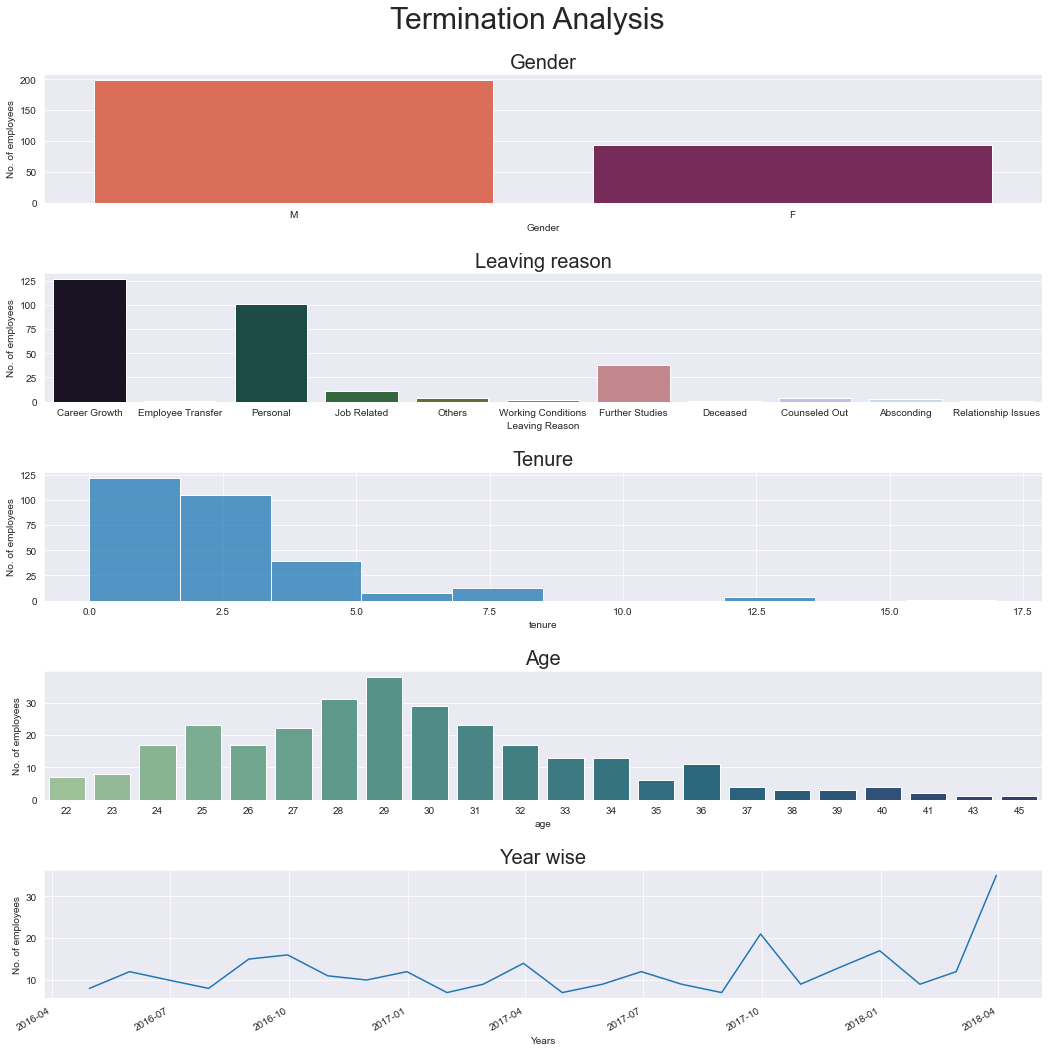

In [138]:

fig, ax = plt.subplots(5,1,figsize=(15,15))
plt.rcParams['font.size'] = '10'
plt.suptitle('Termination Analysis',fontsize='30')

#Gender wise
sns.countplot(data=termination,x='Gender',ax=ax[0],palette="rocket_r")
ax[0].set_title('Gender',fontsize='20')
ax[0].set_ylabel('No. of employees')

#Reason for leaving
sns.countplot(data=termination,x='Leaving Reason',ax=ax[1],palette="cubehelix")
ax[1].set_title('Leaving reason',fontsize='20')
ax[1].set_ylabel('No. of employees')

# Tenure wise
sns.histplot(data=termination,x='tenure',ax=ax[2],palette="viridis",bins=10)
#sns.countplot(data=termination,x='tenure',ax=ax[2],palette="viridis")
ax[2].set_title('Tenure',fontsize='20')
ax[2].set_ylabel('No. of employees')

# Age wise
sns.countplot(data=termination,x='age',ax=ax[3],palette="crest")
ax[3].set_title('Age',fontsize='20')
ax[3].set_ylabel('No. of employees')

#Year wise
termination['date of leaving'].value_counts().plot(kind='line',ax=ax[4])
ax[4].set_title('Year wise',fontsize='20')
ax[4].set_ylabel('No. of employees')
ax[4].set_xlabel('Years')

plt.tight_layout(pad=2)
plt.show();

## data

In [139]:
missing(df6)

Series([], dtype: int64)

In [140]:
req_cols = ['Employee No','Total Available Hours','Total Hours','Leave Hours','Work Hours','Training Hours','BD Hours','NC Hours','tenure','Utilisation%','pc','ep','el','relocate','pc_change','promotion','Y']

In [141]:
final = df6[req_cols]

In [142]:
rename = {
    'pc':'profit center',
    'ep':'employee position',
    'el':'employee location',
    'pc_change':'profit center change',
    'Y':'resigned'
}

In [143]:
final.rename(columns=rename,inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [144]:
final.sample(5)

,Employee No,Total Available Hours,Total Hours,Leave Hours,Work Hours,Training Hours,BD Hours,NC Hours,tenure,Utilisation%,profit center,employee position,employee location,relocate,profit center change,promotion,resigned
524,532,143.0,153.5,10.5,69.5,0.5,0.0,77.5,1.4,48.60,PC - 1,Level 8,Location 3,no,no,no,1
119,123,159.0,161.0,1.0,75.0,1.0,4.0,81.0,4.4,47.17,PC - 3,Level 6,Location 1,no,no,no,1
166,170,147.5,173.5,25.0,150.0,1.5,0.0,14.5,4.8,101.69,PC - 2,Level 6,Location 7,no,no,no,0
230,235,45.0,52.0,7.0,33.5,0.0,0.0,4.0,3.4,74.44,PC - 3,Level 8,Location 2,no,yes,no,1
455,463,154.5,173.5,19.5,17.5,0.0,70.0,68.5,2.5,11.33,PC - 2,Level 3,Location 7,no,no,no,0


In [145]:
final.columns

Index(['Employee No', 'Total Available Hours', 'Total Hours', 'Leave Hours',
       'Work Hours', 'Training Hours', 'BD Hours', 'NC Hours', 'tenure',
       'Utilisation%', 'profit center', 'employee position',
       'employee location', 'relocate', 'profit center change', 'promotion',
       'resigned'],
      dtype='object')

In [146]:
final.shape

(1096, 17)

In [147]:
final['resigned'].value_counts()

0    820
1    276
Name: resigned, dtype: int64

In [148]:
final.to_csv('final.csv',index=False)

# Feature selection and model Building

In [149]:
data = pd.read_csv('final.csv')

In [150]:
#data = data.set_index('Employee No')

In [151]:
data.sample(5)

,Employee No,Total Available Hours,Total Hours,Leave Hours,Work Hours,Training Hours,BD Hours,NC Hours,tenure,Utilisation%,profit center,employee position,employee location,relocate,profit center change,promotion,resigned
571,579,156.5,179.0,19.5,127.5,3.5,0.0,32.0,1.9,81.47,PC - 1,Level 7,Location 3,no,no,no,0
17,19,154.0,173.5,19.5,15.5,0.0,1.0,153.0,11.8,10.06,PC - 3,Level 3,Location 1,no,no,no,1
1068,1080,170.0,200.0,8.0,0.0,22.0,0.0,170.0,0.1,0.00,PC - 1,Level 8,Location 3,no,no,no,0
327,333,162.0,173.5,11.0,109.0,0.5,0.0,63.0,3.0,67.28,PC - 2,Level 6,Location 7,no,yes,no,1
195,199,152.0,173.5,18.0,104.0,3.5,9.5,43.5,4.7,68.42,PC - 2,Level 5,Location 7,no,yes,yes,0


In [152]:
## Defining a funtion for model building
def model(model,x_train,x_test,y_train,y_test):
    import warnings
    warnings.filterwarnings('ignore')
    
    train = model.fit(x_train,y_train)
    train_predict = model.predict(x_train)
    a = print('Train data')
    b = print(classification_report(y_train,train_predict))
    c = plot_confusion_matrix(model,x_train,y_train)
    plt.grid(False)
    
    test_predict = model.predict(x_test)
    d = print('Test data')
    e = print(classification_report(y_test,test_predict))
    f = plot_confusion_matrix(model,x_test,y_test)
    plt.grid(False)

In [153]:
dict = {
    'unknown':1,
    'Level A3':2,
    'Level A2':3,
    'Level A1':4,
    'Level 10':5,
    'Level 8':6,
    'Level 7':7,
    'Level 6':8,
    'Level 5':9,
    'Level 4':10,
    'Level 3':1,
    'Level 2':12,
    'Level 1':13
    }

levels = list(dict.keys())
rank = list(dict.values())

for l,r in zip(levels,rank):
    data.loc[data['employee position']==l,'employee position']=r

In [154]:
data.sample(5)

,Employee No,Total Available Hours,Total Hours,Leave Hours,Work Hours,Training Hours,BD Hours,NC Hours,tenure,Utilisation%,profit center,employee position,employee location,relocate,profit center change,promotion,resigned
898,913,149.0,182.0,19.0,157.0,14.0,0.0,28.0,0.8,105.37,PC - 2,6,Location 7,no,no,no,0
557,565,156.0,181.0,19.5,161.5,6.0,0.0,11.0,1.9,103.53,PC - 2,7,Location 7,no,no,no,0
288,294,171.0,173.5,2.5,165.5,0.5,0.0,7.0,3.2,96.78,PC - 3,7,Location 1,no,yes,no,0
1041,1053,288.0,320.0,8.0,276.0,24.0,0.0,12.0,0.1,95.83,PC - 3,6,Location 1,no,no,no,0
534,542,152.0,173.5,17.0,138.5,4.5,0.0,20.5,2.1,91.12,PC - 2,7,Location 7,no,no,no,0


In [155]:
data['employee position'] = pd.to_numeric(data['employee position'])

In [156]:
data.dtypes

Employee No                int64
Total Available Hours    float64
Total Hours              float64
Leave Hours              float64
Work Hours               float64
Training Hours           float64
BD Hours                 float64
NC Hours                 float64
tenure                   float64
Utilisation%             float64
profit center             object
employee position          int64
employee location         object
relocate                  object
profit center change      object
promotion                 object
resigned                   int64
dtype: object

In [157]:
data.isnull().sum()

Employee No              0
Total Available Hours    0
Total Hours              0
Leave Hours              0
Work Hours               0
Training Hours           0
BD Hours                 0
NC Hours                 0
tenure                   0
Utilisation%             0
profit center            0
employee position        0
employee location        0
relocate                 0
profit center change     0
promotion                0
resigned                 0
dtype: int64

In [158]:
cat = data.select_dtypes(include='object')
cat = pd.get_dummies(cat)
cat = pd.concat([cat,data['employee position']],axis=1)
cat.head()

,profit center_PC - 1,profit center_PC - 10,profit center_PC - 11,profit center_PC - 2,profit center_PC - 3,profit center_PC - 5,profit center_PC - 6,profit center_PC - 7,profit center_PC - 9,employee location_Location 1,employee location_Location 2,employee location_Location 3,employee location_Location 4,employee location_Location 5,employee location_Location 6,employee location_Location 7,employee location_Location 8,employee location_Location 9,relocate_no,relocate_yes,profit center change_no,profit center change_yes,promotion_no,promotion_unknown,promotion_yes,employee position
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,13
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,12
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,12
3,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,12
4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,12


# Chi-Square test

![](https://miro.medium.com/max/266/1*S8rfFkmLhDbOz4RGNwuz6g.png)

## Calculation of expected
![](https://miro.medium.com/max/207/1*sD5qNUh_lsiXjSF_dE6W_g.png)

## Accept or Reject the Null Hypothesis
## With 95% confidence that is alpha = 0.05, we will check the calculated Chi-Square value falls in the acceptance or rejection region.
## Having degrees of freedom =1(calculated with contingency table) and alpha =0.05 the Chi-Square value is 3.84.

In [159]:
X = cat.copy()
y = data[['resigned']]

In [160]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [161]:
chi2_features = SelectKBest(chi2, k = 10)
X_kbest_features = chi2_features.fit(X, y)

In [162]:
dfscores = pd.DataFrame(X_kbest_features.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores = featureScores.sort_values('Score',ascending=False).reset_index(drop=True)
req_cat = featureScores[featureScores['Score']>3.84]

In [163]:
req_cat

,Specs,Score
0,profit center_PC - 5,80.217391
1,promotion_yes,54.526829
2,profit center_PC - 6,53.478261
3,promotion_no,9.546079
4,profit center_PC - 7,5.942029
5,relocate_yes,5.554619
6,employee location_Location 8,4.873370
7,profit center_PC - 1,4.371056


In [164]:
cat_sig_cols = cat.filter(regex=r'(profit center|promotion|relocate|employee location)').columns
cat_sig_cols

Index(['profit center_PC - 1', 'profit center_PC - 10',
       'profit center_PC - 11', 'profit center_PC - 2', 'profit center_PC - 3',
       'profit center_PC - 5', 'profit center_PC - 6', 'profit center_PC - 7',
       'profit center_PC - 9', 'employee location_Location 1',
       'employee location_Location 2', 'employee location_Location 3',
       'employee location_Location 4', 'employee location_Location 5',
       'employee location_Location 6', 'employee location_Location 7',
       'employee location_Location 8', 'employee location_Location 9',
       'relocate_no', 'relocate_yes', 'profit center change_no',
       'profit center change_yes', 'promotion_no', 'promotion_unknown',
       'promotion_yes'],
      dtype='object')

In [165]:
#cat_sig_cols = list(req_cat['Specs'].values)
#cat_sig_cols

In [166]:
df1 = data.select_dtypes(include=np.number)

In [167]:
cols = ['employee position','resigned']
df1.drop(cols,axis=1,inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [168]:
df1.columns

Index(['Employee No', 'Total Available Hours', 'Total Hours', 'Leave Hours',
       'Work Hours', 'Training Hours', 'BD Hours', 'NC Hours', 'tenure',
       'Utilisation%'],
      dtype='object')

# Model Building

In [169]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [170]:
#df1.corr()

In [171]:
#num_cols = ['Total Hours', 'Leave Hours']
#num_cols = ['Total Hours','Leave Hours','Training Hours','tenure','Utilisation%']
#num_cols = ['Total Hours','Leave Hours']
#num_cols = ['Total Hours','Leave Hours','Training Hours']
num_cols = ['Total Available Hours','Work Hours','Leave Hours','Training Hours','tenure']
#num_cols = ['Total Hours','Leave Hours','Training Hours','tenure','Utilisation%']
final = pd.concat([df1['Employee No'],df1[num_cols],cat[cat_sig_cols],data['resigned']],axis=1)

In [172]:
#Independent Variable
x = final.iloc[:,:-1]

#Dependent variable
y = final.iloc[:,-1]

# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,train_size=0.8)
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

In [173]:
analysis_cols = ['Employee No','Total Available Hours','Work Hours','tenure','promotion_yes']
train_analysis = x_train[analysis_cols]
test_analysis = x_test[analysis_cols]

train_analysis.rename(columns={'promotion_yes':'promotion'},inplace=True)
test_analysis.rename(columns={'promotion_yes':'promotion'},inplace=True)

test_analysis['utilization%'] = round(((test_analysis['Work Hours']/test_analysis['Total Available Hours'])*100),2)
train_analysis['utilization%'] = round(((train_analysis['Work Hours']/train_analysis['Total Available Hours'])*100),2)

x_train.drop('Employee No',axis=1,inplace=True)
x_test.drop('Employee No',axis=1,inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-173-5d1c21262df2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_analysis['utilization%'] = round(((test_analysis['Work Hours']/test_analysis['Total Available Hours'])*100),2)
<ipython-input-173-5d1c21262df2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [174]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# Train dataset
num_features_train = x_train.iloc[:,0:6]
num_features_train = pd.DataFrame(ss.fit_transform(num_features_train),columns=num_features_train.columns)
train = pd.concat([num_features_train,x_train.iloc[:,6:]],axis=1)

# Test dataset
num_features_test = x_test.iloc[:,0:6]
num_features_test = pd.DataFrame(ss.fit_transform(num_features_test),columns=num_features_test.columns)
test = pd.concat([num_features_test,x_test.iloc[:,6:]],axis=1)

from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(train,y_train)

In [175]:
Y_counts = pd.DataFrame({
    'Before': y_train.value_counts().reset_index(drop=True),
    'After': y_train_smote.value_counts().reset_index(drop=True)
})
Y_counts

,Before,After
0,648,648
1,228,648


## Logistic Regression

### Metric for evaluation - Recall

Train data
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       648
           1       0.85      0.87      0.86       648

    accuracy                           0.86      1296
   macro avg       0.86      0.86      0.86      1296
weighted avg       0.86      0.86      0.86      1296

Test data
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       172
           1       0.59      0.92      0.72        48

    accuracy                           0.85       220
   macro avg       0.78      0.87      0.81       220
weighted avg       0.89      0.85      0.86       220



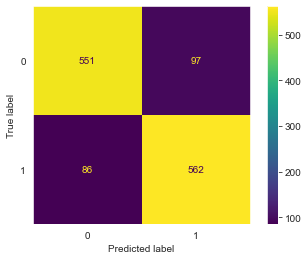

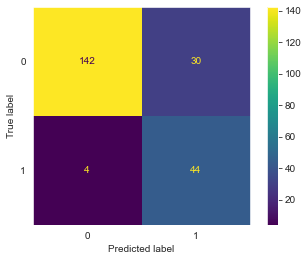

In [176]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model(lr,x_train_smote,test,y_train_smote,y_test)

## Random Forest

Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       648
           1       1.00      1.00      1.00       648

    accuracy                           1.00      1296
   macro avg       1.00      1.00      1.00      1296
weighted avg       1.00      1.00      1.00      1296

Test data
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       172
           1       0.66      0.77      0.71        48

    accuracy                           0.86       220
   macro avg       0.80      0.83      0.81       220
weighted avg       0.87      0.86      0.87       220



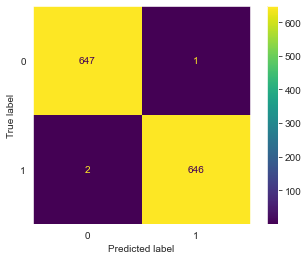

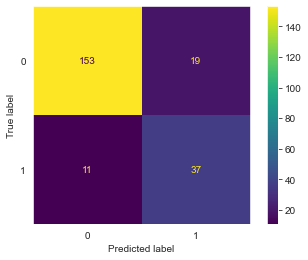

In [177]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
model(rf,x_train_smote,test,y_train_smote,y_test)

## SVC

SVC
Train data
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       648
           1       0.89      0.92      0.90       648

    accuracy                           0.90      1296
   macro avg       0.90      0.90      0.90      1296
weighted avg       0.90      0.90      0.90      1296

Test data
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       172
           1       0.67      0.88      0.76        48

    accuracy                           0.88       220
   macro avg       0.81      0.88      0.84       220
weighted avg       0.90      0.88      0.88       220



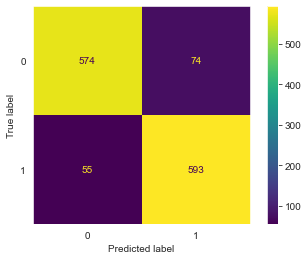

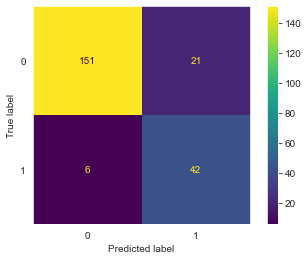

In [178]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
print('SVC')
model(svc,x_train_smote,test,y_train_smote,y_test)

# Feature importance

In [179]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(svc, test, y_test)
feature_names = test.columns
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()

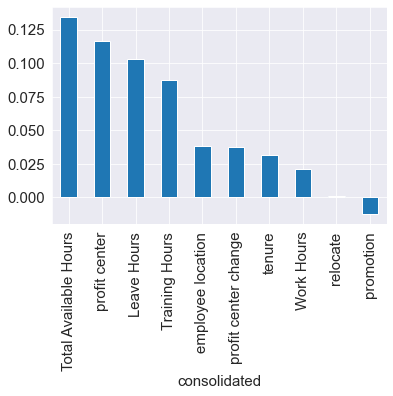

In [180]:
dict = {
    'Features' : features[sorted_idx],
    'Values' : perm_importance.importances_mean[sorted_idx]
}
feature_importance = pd.DataFrame(dict).sort_values('Values',ascending=False).reset_index(drop=True)
feature_importance['consolidated'] = feature_importance['Features'].apply(lambda x: x.split('_')[0])

#Plot
plt.rcParams['font.size'] = '15'
feature_importance.groupby('consolidated')['Values'].sum().sort_values(ascending=False).plot(kind='bar');

## List of employees expected to leave organisation

In [181]:
svc_model = svc.fit(x_train_smote,y_train_smote)

In [182]:
test_analysis['predict'] = svc_model.predict(test)

In [183]:
test_analysis = test_analysis.merge(employee_list,how='left',on='Employee No')

In [184]:
pop = test_analysis.pop('Employee Name')
test_analysis.insert(1,'Employee Name',pop)
test_analysis

,Employee No,Employee Name,Total Available Hours,Work Hours,tenure,promotion,utilization%,predict
0,1074,Emery Dyer,126.0,80.0,0.1,0,63.49,0
1,29,Cynthia Leonora,150.0,65.5,10.3,0,43.67,0
2,726,Doti Enrichetta,175.5,162.5,1.3,1,92.59,0
3,499,Elyn Kala,137.0,142.5,2.2,0,104.01,0
4,200,Dottie Bidget,147.5,58.5,4.7,0,39.66,0
...,...,...,...,...,...,...,...,...
215,768,Xenia Madelina,150.0,50.0,1.1,0,33.33,0
216,664,Brandi Priscella,92.0,29.0,0.4,0,31.52,1
217,772,Modesty Hillary,146.0,54.0,1.1,0,36.99,0
218,710,Loella Constancia,129.0,85.5,1.6,0,66.28,0


In [185]:
expected_leaving = test_analysis[test_analysis['predict']==1].sort_values('utilization%',ascending=False).reset_index(drop=True)

In [186]:
expected_leaving = expected_leaving.rename(columns={'tenure':'tenure(years)'})

In [187]:
expected_leaving.head(10)

,Employee No,Employee Name,Total Available Hours,Work Hours,tenure(years),promotion,utilization%,predict
0,236,Magda Sibella,159.5,161.5,3.0,0,101.25,1
1,451,Heida Meara,139.0,139.0,1.3,0,100.00,1
2,419,Donia Cassy,157.0,157.0,1.0,0,100.00,1
3,362,Felicdad Bryna,153.0,152.0,2.8,0,99.35,1
4,273,Pavla Irina,124.0,123.0,1.7,0,99.19,1
5,575,Annette Talya,143.0,141.0,0.9,0,98.60,1
6,206,Micheline Kissie,139.0,137.0,3.1,0,98.56,1
7,963,Orlando Winters,89.0,87.0,0.5,0,97.75,1
8,112,Giselle Trixy,153.0,148.0,4.5,0,96.73,1
9,784,Lurleen Joela,118.0,110.5,1.0,0,93.64,1
